Problem Statement: Analyzing Air Quality Index (AQI) Trends in a City

Dataset: "City_Air_Quality.csv"
Description: The dataset contains information about air quality measurements in a specific
city over a period of time. It includes attributes such as date, time, pollutant levels (e.g.,
PM2.5, PM10, CO), and the Air Quality Index (AQI) values. The goal is to use the matplotlib
library to create visualizations that effectively represent the AQI trends and patterns for
different pollutants in the city.
Tasks to Perform:
1. Import the "City_Air_Quality.csv" dataset.
2. Explore the dataset to understand its structure and content.
3. Identify the relevant variables for visualizing AQI trends, such as date, pollutant
levels, and AQI values.
4. Create line plots or time series plots to visualize the overall AQI trend over time.
5. Plot individual pollutant levels (e.g., PM2.5, PM10, CO) on separate line plots to
visualize their trends over time.
6. Use bar plots or stacked bar plots to compare the AQI values across different dates or
time periods.
7. Create box plots or violin plots to analyze the distribution of AQI values for different
pollutant categories.
8. Use scatter plots or bubble charts to explore the relationship between AQI values and
pollutant levels.
9. Customize the visualizations by adding labels, titles, legends, and appropriate color
schemes.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer

%matplotlib inline

In [3]:
data = pd.read_csv("data.csv")
print(data.index)

C:\Users\Admin\AppData\Local\Temp\ipykernel_11092\599996903.py:1: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("data.csv")


RangeIndex(start=0, stop=435742, step=1)


In [4]:
sns.set(style="ticks", rc = {'figure.figsize':(20,15)})

# Supressing update warnings

import warnings
warnings.filterwarnings('ignore')

Checking the dataset

We can see that there are quite a number of NaNs in the dataset. To proceed with the EDA, we must handle these NaNs by either removing them or filling them. I will be doing both.

In [5]:
# checking the original dataset
print(data.isnull().sum())
print(data.shape)
data.info()

stn_code                       144077
sampling_date                       3
state                               0
location                            3
agency                         149481
type                             5393
so2                             34646
no2                             16233
rspm                            40222
spm                            237387
location_monitoring_station     27491
pm2_5                          426428
date                                7
dtype: int64
(435742, 13)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 435742 entries, 0 to 435741
Data columns (total 13 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   stn_code                     291665 non-null  object 
 1   sampling_date                435739 non-null  object 
 2   state                        435742 non-null  object 
 3   location                     435739 non-null  object 
 4   agency    

# Cleaning the dataset

Removing NaNs
Looking at the dataset head, we can conclude that the following columns:

1. stn_code
2. agency
3. sampling_date
4. location_monitoring_agency

do not add much to the dataset in terms of information that can't already be extracted from other columns. Therefore, we drop these columns.

Since date also has missing values, we will drop the rows containing these values as they're of little use as well.

Cleaning values
Since the geographical nomenclature has changed over time, we change it here as well to correspond to more accurate insights.

The type column

Currently, the type column has several names for the same type and therefore, it is better to clean it up and make it more uniform.

In [6]:
# Cleaning up the data


# cleaning up name changes

data.state = data.state.replace({'Uttaranchal':'Uttarakhand'})
data.state[data.location == "Jamshedpur"] = data.state[data.location == 'Jamshedpur'].replace({"Bihar":"Jharkhand"})

#changing types to uniform format

types = {
    "Residential": "R",
    "Residential and others": "RO",
    "Residential, Rural and other Areas": "RRO",
    "Industrial Area": "I",
    "Industrial Areas": "I",
    "Industrial": "I",
    "Sensitive Area": "S",
    "Sensitive Areas": "S",
    "Sensitive": "S",
    np.nan: "RRO"
}
data.type = data.type.replace(types)

In [7]:
data.head()

,stn_code,sampling_date,state,location,agency,type,so2,no2,rspm,spm,location_monitoring_station,pm2_5,date
0,150.0,February - M021990,Andhra Pradesh,Hyderabad,NaN,RRO,4.8,17.4,NaN,NaN,NaN,NaN,1990-02-01
1,151.0,February - M021990,Andhra Pradesh,Hyderabad,NaN,I,3.1,7.0,NaN,NaN,NaN,NaN,1990-02-01
2,152.0,February - M021990,Andhra Pradesh,Hyderabad,NaN,RRO,6.2,28.5,NaN,NaN,NaN,NaN,1990-02-01
3,150.0,March - M031990,Andhra Pradesh,Hyderabad,NaN,RRO,6.3,14.7,NaN,NaN,NaN,NaN,1990-03-01
4,151.0,March - M031990,Andhra Pradesh,Hyderabad,NaN,I,4.7,7.5,NaN,NaN,NaN,NaN,1990-03-01


In [8]:
# defining columns of importance, which shall be used reguarly
VALUE_COLS = ['so2', 'no2', 'rspm', 'spm', 'pm2_5']

Filling NaNs
Since our pollutants column contain a lot of NaNs, we must fill them to have consistent data. If we drop the rows containing NaNs, we will be left with nothing.

I use the SimpleImputer from sklearn.imputer (v0.20.2) to fill the missing values in every column with the mean.

In [9]:
# invoking SimpleImputer to fill missing values
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
data[VALUE_COLS] = imputer.fit_transform(data[VALUE_COLS])

In [10]:
# checking to see if the dataset has any null values left over and the format
print(data.isnull().sum())
data.tail()

stn_code                       144077
sampling_date                       3
state                               0
location                            3
agency                         149481
type                                0
so2                                 0
no2                                 0
rspm                                0
spm                                 0
location_monitoring_station     27491
pm2_5                               0
date                                7
dtype: int64


,stn_code,sampling_date,state,location,agency,type,so2,no2,rspm,spm,location_monitoring_station,pm2_5,date
435737,SAMP,24-12-15,West Bengal,ULUBERIA,West Bengal State Pollution Control Board,RIRUO,22.000000,50.000000,143.000000,220.78348,"Inside Rampal Industries,ULUBERIA",40.791467,2015-12-24
435738,SAMP,29-12-15,West Bengal,ULUBERIA,West Bengal State Pollution Control Board,RIRUO,20.000000,46.000000,171.000000,220.78348,"Inside Rampal Industries,ULUBERIA",40.791467,2015-12-29
435739,NaN,NaN,andaman-and-nicobar-islands,NaN,NaN,RRO,10.829414,25.809623,108.832784,220.78348,NaN,40.791467,NaN
435740,NaN,NaN,Lakshadweep,NaN,NaN,RRO,10.829414,25.809623,108.832784,220.78348,NaN,40.791467,NaN
435741,NaN,NaN,Tripura,NaN,NaN,RRO,10.829414,25.809623,108.832784,220.78348,NaN,40.791467,NaN


# Plotting pollutant levels as yearly averages for states

In [11]:
# defining a function that plots SO2, NO2, RSPM and SPM yearly average levels for a given state
# since data is available monthly, it was resampled to a year and averaged to obtain yearly averages
# years for which no data was collected has not been imputed
def plot_for_state(state):
    fig, ax = plt.subplots(2,2, figsize=(20,12))
    fig.suptitle(state, size=20)
    state = aqi[aqi.state == state]
    state = state.reset_index().set_index('date')[VALUE_COLS].resample('Y').mean()
    state.so2.plot(legend=True, ax=ax[0][0], title="so2")
    ax[0][0].set_ylabel("so2 (µg/m3)")
    ax[0][0].set_xlabel("Year")

    state.no2.plot(legend=True, ax=ax[0][1], title="no2")
    ax[0][1].set_ylabel("no2 (µg/m3)")
    ax[0][1].set_xlabel("Year")

    state.rspm.plot(legend=True, ax=ax[1][0], title="rspm")
    ax[1][0].set_ylabel("RSPM (PM10 µg/m3)")
    ax[1][0].set_xlabel("Year")

    state.spm.plot(legend=True, ax=ax[1][1], title="spm")
    ax[1][1].set_ylabel("SPM (PM10 µg/m3)")
    ax[1][1].set_xlabel("Year")

NameError: name 'aqi' is not defined

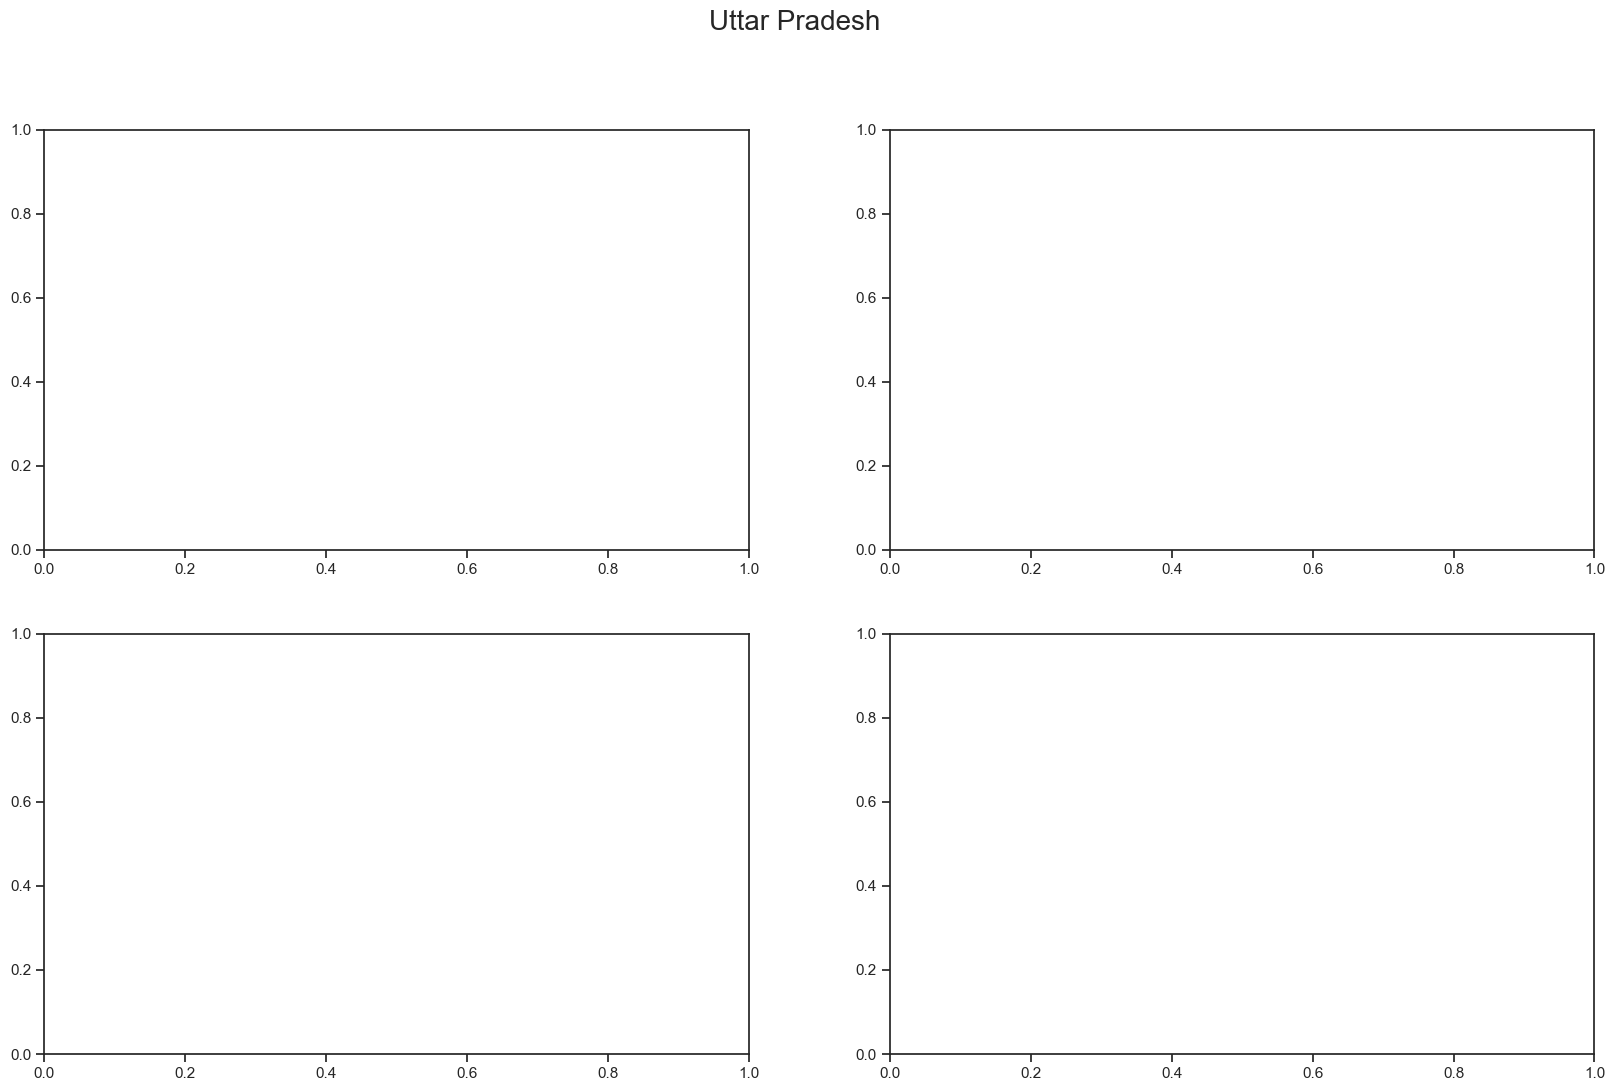

In [12]:
plot_for_state("Uttar Pradesh")

Plotting Uttar Pradesh, we see that SO2 levels have fallen in the state while NO2 levels have risen. Information about RSPM and SPM can't be concluded since a lot of data is missing.

# Plotting highest and lowest ranking states

In [13]:
# defining a function to find and plot the top 10 and bottom 10 states for a given indicator (defaults to SO2)
def top_and_bottom_10_states(indicator="so2"):
    fig, ax = plt.subplots(2,1, figsize=(20, 12))

    ind = data[[indicator, 'state']].groupby('state', as_index=False).median().sort_values(by=indicator,ascending=False)
    top10 = sns.barplot(x='state', y=indicator, data=ind[:10], ax=ax[0], color='red')
    top10.set_title("Top 10 states by {} (1991-2016)".format(indicator))
    top10.set_ylabel("so2 (µg/m3)")
    top10.set_xlabel("State")

    bottom10 = sns.barplot(x='state', y=indicator, data=ind[-10:], ax=ax[1], color='green')
    bottom10.set_title("Bottom 10 states by {} (1991-2016)".format(indicator))
    bottom10.set_ylabel("so2 (µg/m3)")
    bottom10.set_xlabel("State")

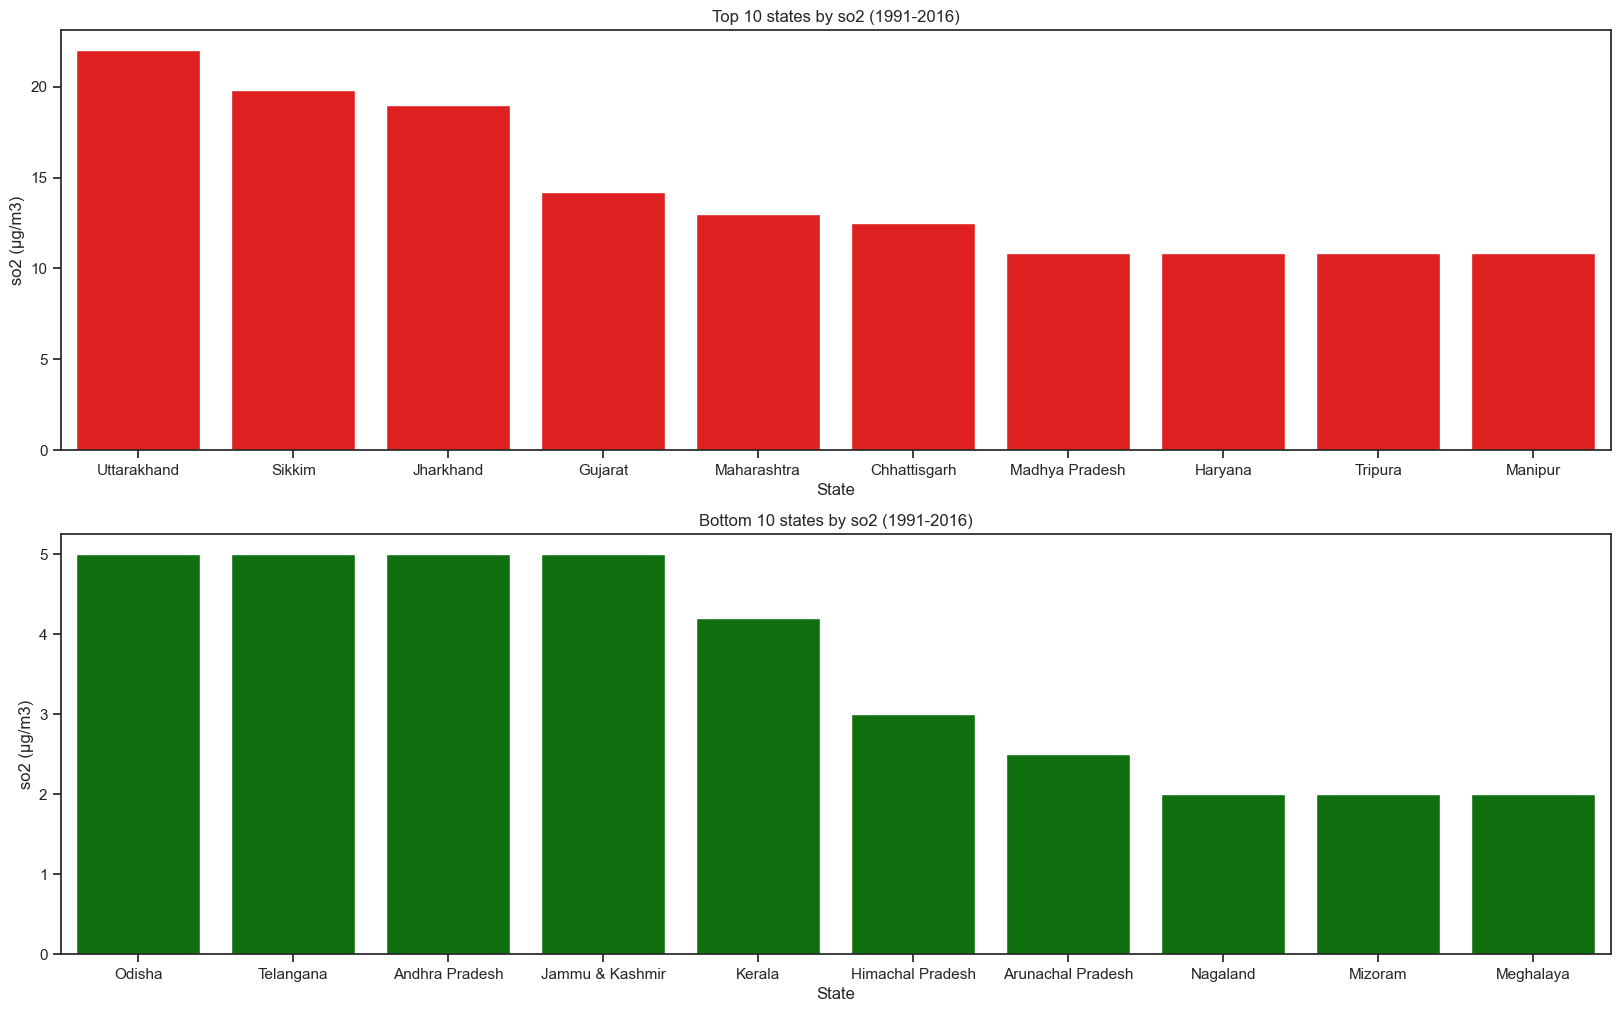

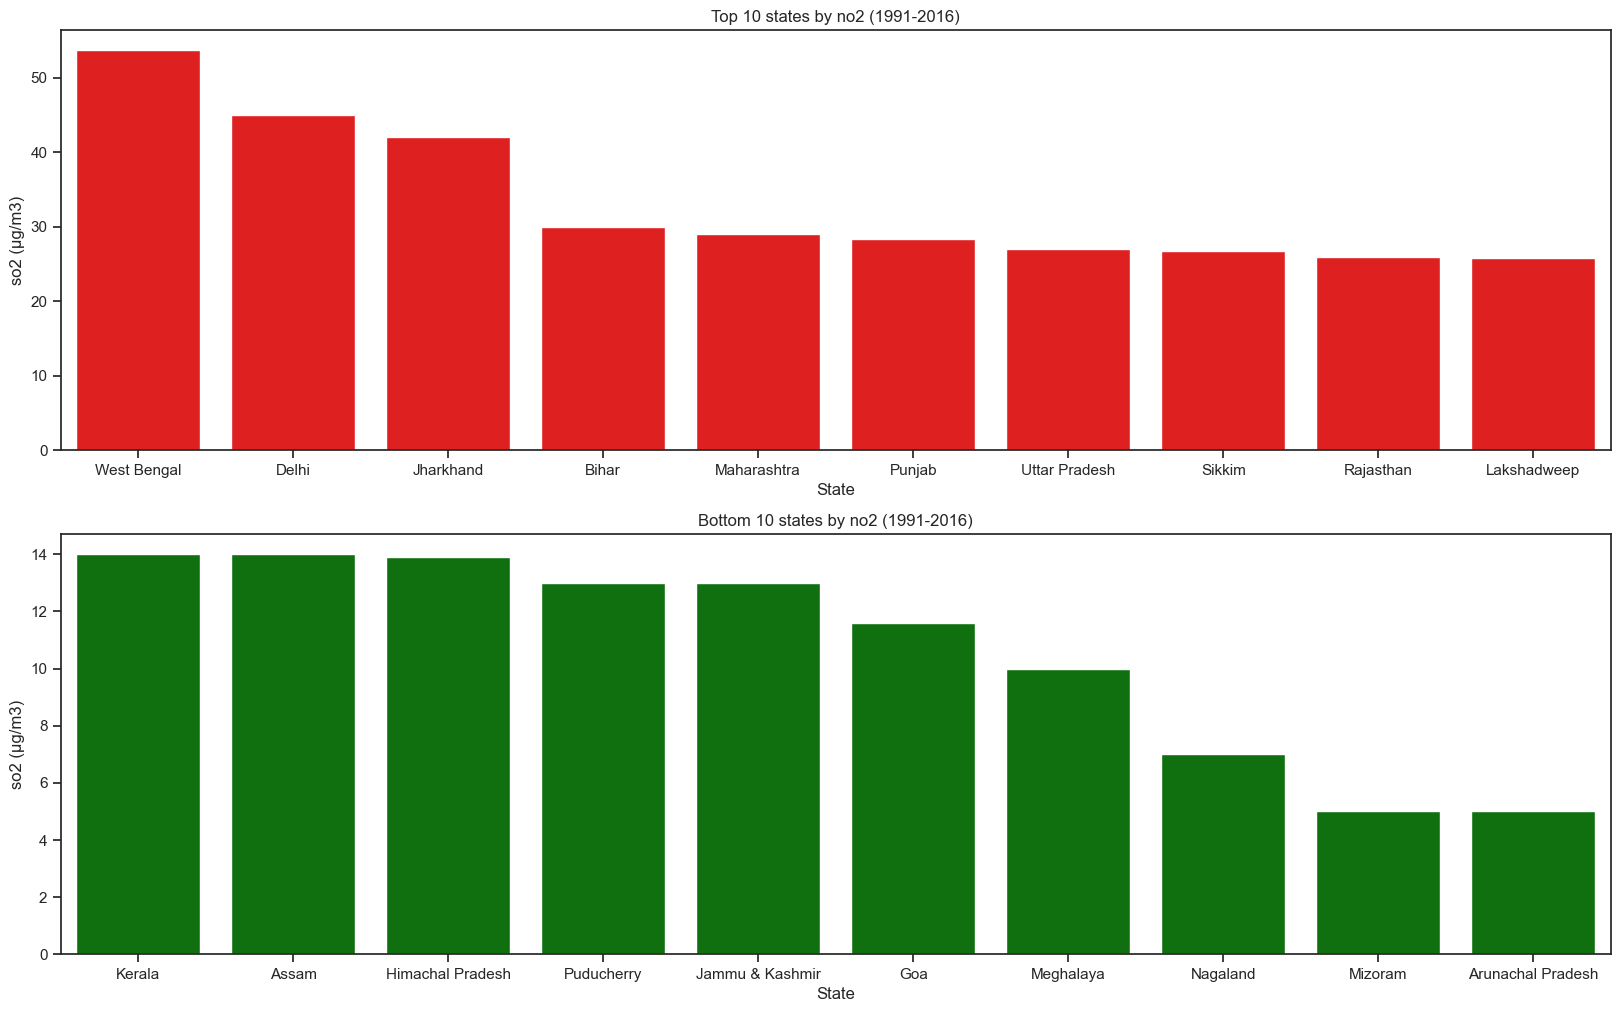

In [14]:
top_and_bottom_10_states("so2")
top_and_bottom_10_states("no2")

Plotting for SO2, we can see that the top state is Uttarakhand, while the bottom state is Meghalaya.

Plotting for NO2, we can see that the top state is West Bengal, while the bottom state is Mizoram.

# Plotting the highest ever recorded levels

In [15]:
# defining a function to find the highest ever recorded levels for a given indicator (defaults to SO2) by state
# sidenote: mostly outliers
def highest_levels_recorded(indicator="so2"):
    plt.figure(figsize=(20,10))
    ind = data[[indicator, 'location', 'state', 'date']].groupby('state', as_index=False).max()
    highest = sns.barplot(x='state', y=indicator, data=ind)
    highest.set_title("Highest ever {} levels recorded by state".format(indicator))
    plt.xticks(rotation=90)

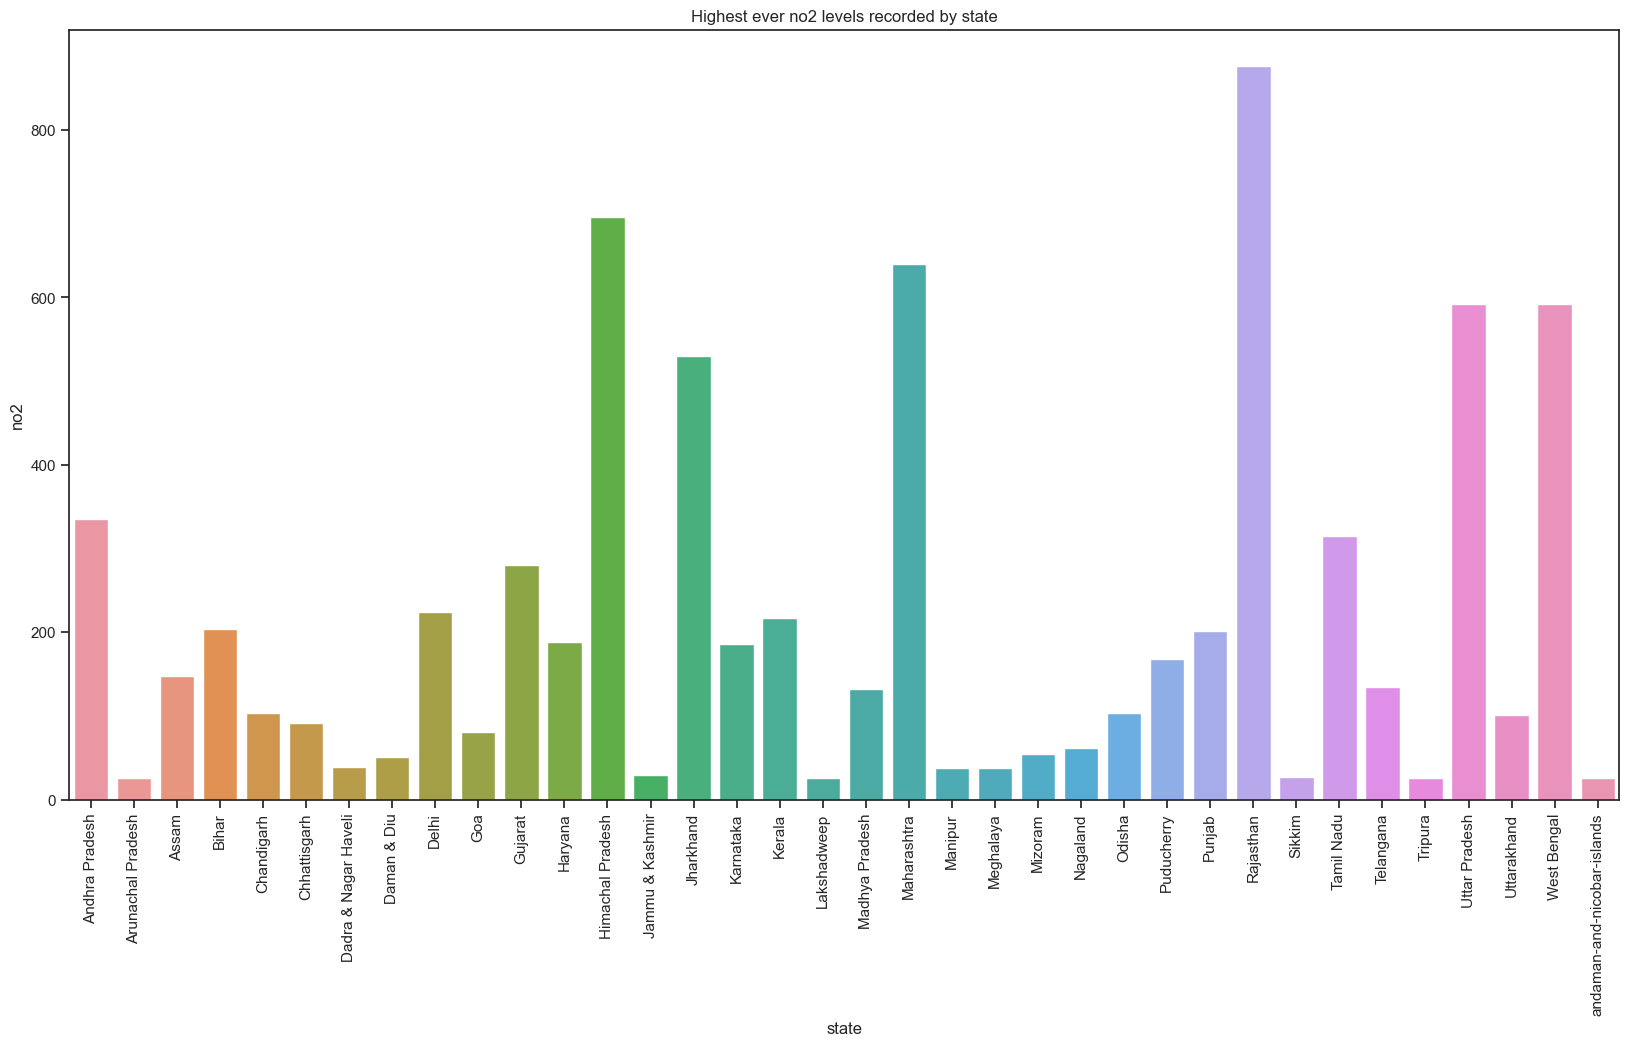

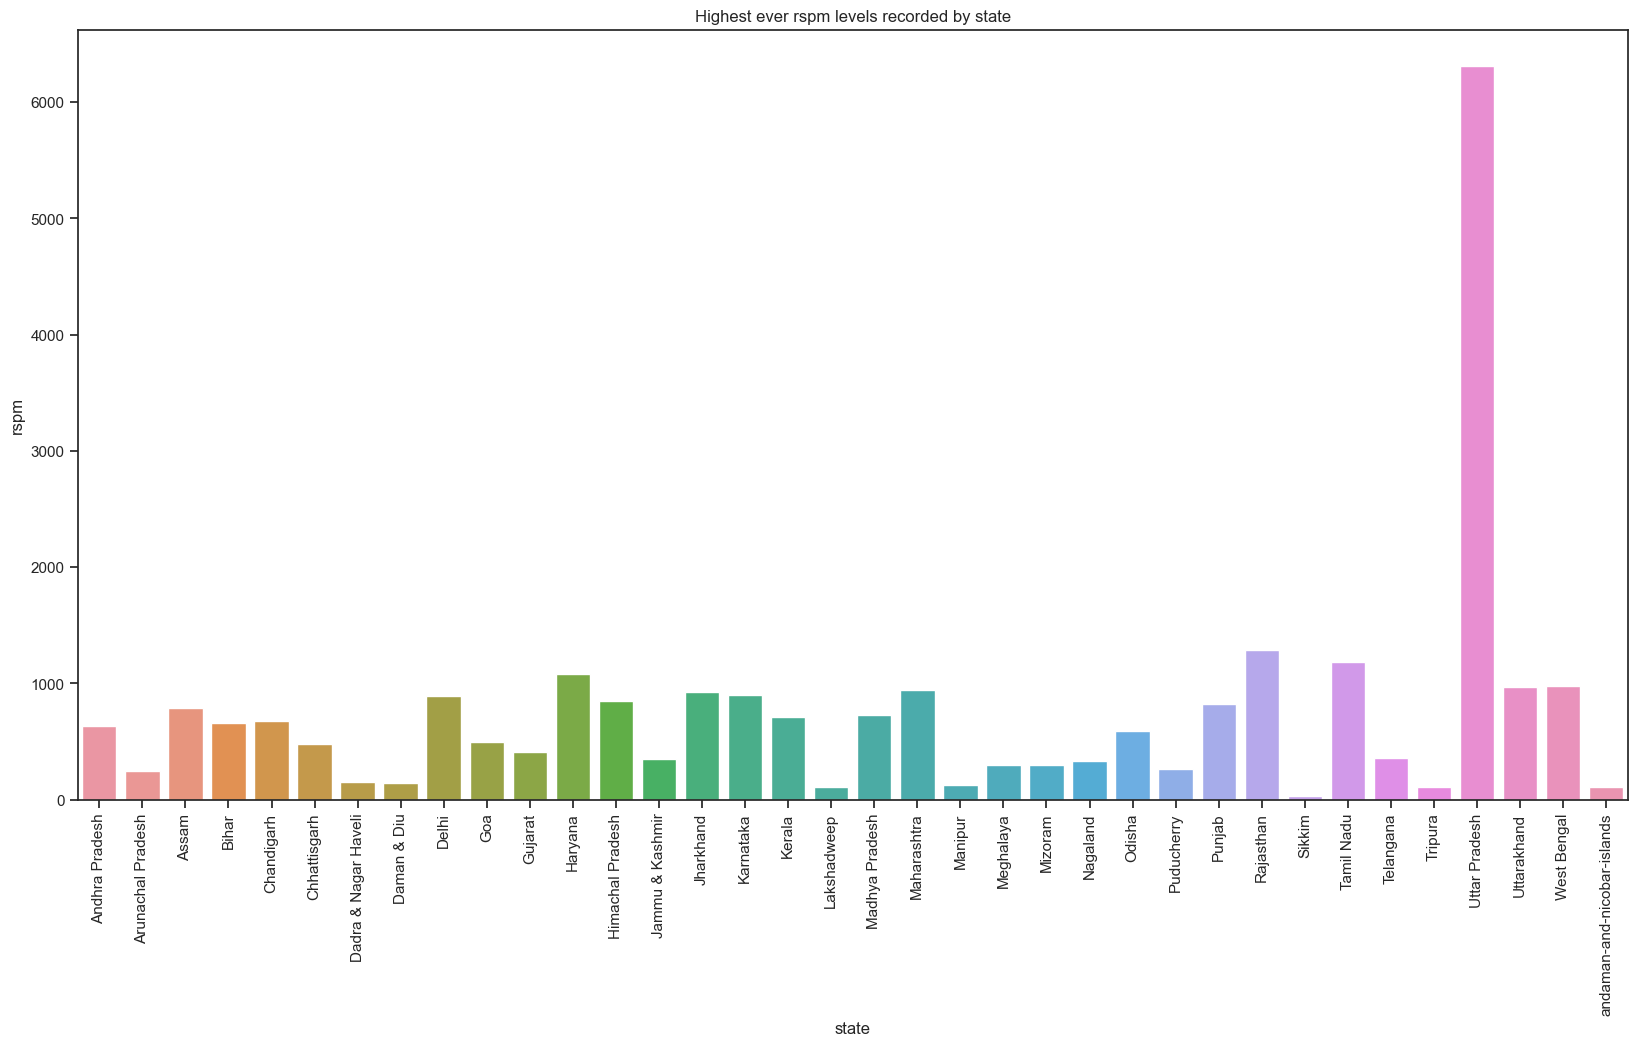

In [16]:
highest_levels_recorded("no2")
highest_levels_recorded("rspm")

Plotting for NO2, we can see that Rajasthan recorded the highest ever NO2 level. Plotting for RSPM, we can see that Uttar Pradesh recorded the highest ever RSPM level.

# Plotting yearly trends

In [17]:
# defining a function to plot the yearly trend values for a given indicator (defaults to SO2) and state (defaults to overall)
def yearly_trend(state="", indicator="so2", ):
    plt.figure(figsize=(20,12))
    data['year'] = data.date.dt.year
    if state is "":
        year_wise = data[[indicator, 'year', 'state']].groupby('year', as_index=False).median()
        trend = sns.pointplot(x='year', y=indicator, data=year_wise)
        trend.set_title('Yearly trend of {}'.format(indicator))
    else:
        year_wise = data[[indicator, 'year', 'state']].groupby(['state','year']).median().loc[state].reset_index()
        trend = sns.pointplot(x='year', y=indicator, data=year_wise)
        trend.set_title('Yearly trend of {} for {}'.format(indicator, state))

In [18]:
yearly_trend()
yearly_trend("Bihar", "no2")

AttributeError: Can only use .dt accessor with datetimelike values

<Figure size 2000x1200 with 0 Axes>

Plotting for SO2, we can see the yearly trend for sulphur dioxide levels in the country. Plotting for NO2 in West Bengal, we can see the yearly trend.

# Plotting a heatmap for a particular indicator

In [19]:
# defining a function to plot a heatmap for yearly median average for a given indicator (defaults to SO2)
def indicator_by_state_and_year(indicator="so2"):
    plt.figure(figsize=(20, 20))
    hmap = sns.heatmap(
        data=data.pivot_table(values=indicator, index='state', columns='year', aggfunc='median', margins=True),
               annot=True, linewidths=.5, cbar=True, square=True, cmap='inferno', cbar_kws={'label': "Annual Average"})

    hmap.set_title("{} by state and year".format(indicator))

In [20]:
indicator_by_state_and_year('no2')

KeyError: 'year'

<Figure size 2000x2000 with 0 Axes>

# Plotting pollutant average by type

In [21]:
# defining a function to plot pollutant averages by type for a given indicator
def type_avg(indicator=""):
    type_avg = data[VALUE_COLS + ['type', 'date']].groupby("type").mean()
    if indicator is not "":
        t = type_avg[indicator].plot(kind='bar')
        plt.xticks(rotation = 0)
        plt.title("Pollutant average by type for {}".format(indicator))
    else:
        t = type_avg.plot(kind='bar')
        plt.xticks(rotation = 0)
        plt.title("Pollutant average by type")

# Plotting pollutant averages by locations/state

In [22]:
# defining a function to plot pollutant averages for a given indicator (defaults to SO2) by locations in a given state
def location_avgs(state, indicator="so2"):
    locs = data[VALUE_COLS + ['state', 'location', 'date']].groupby(['state', 'location']).mean()
    state_avgs = locs.loc[state].reset_index()
    sns.barplot(x='location', y=indicator, data=state_avgs)
    plt.title("Location-wise average for {} in {}".format(indicator, state))
    plt.xticks(rotation = 90)

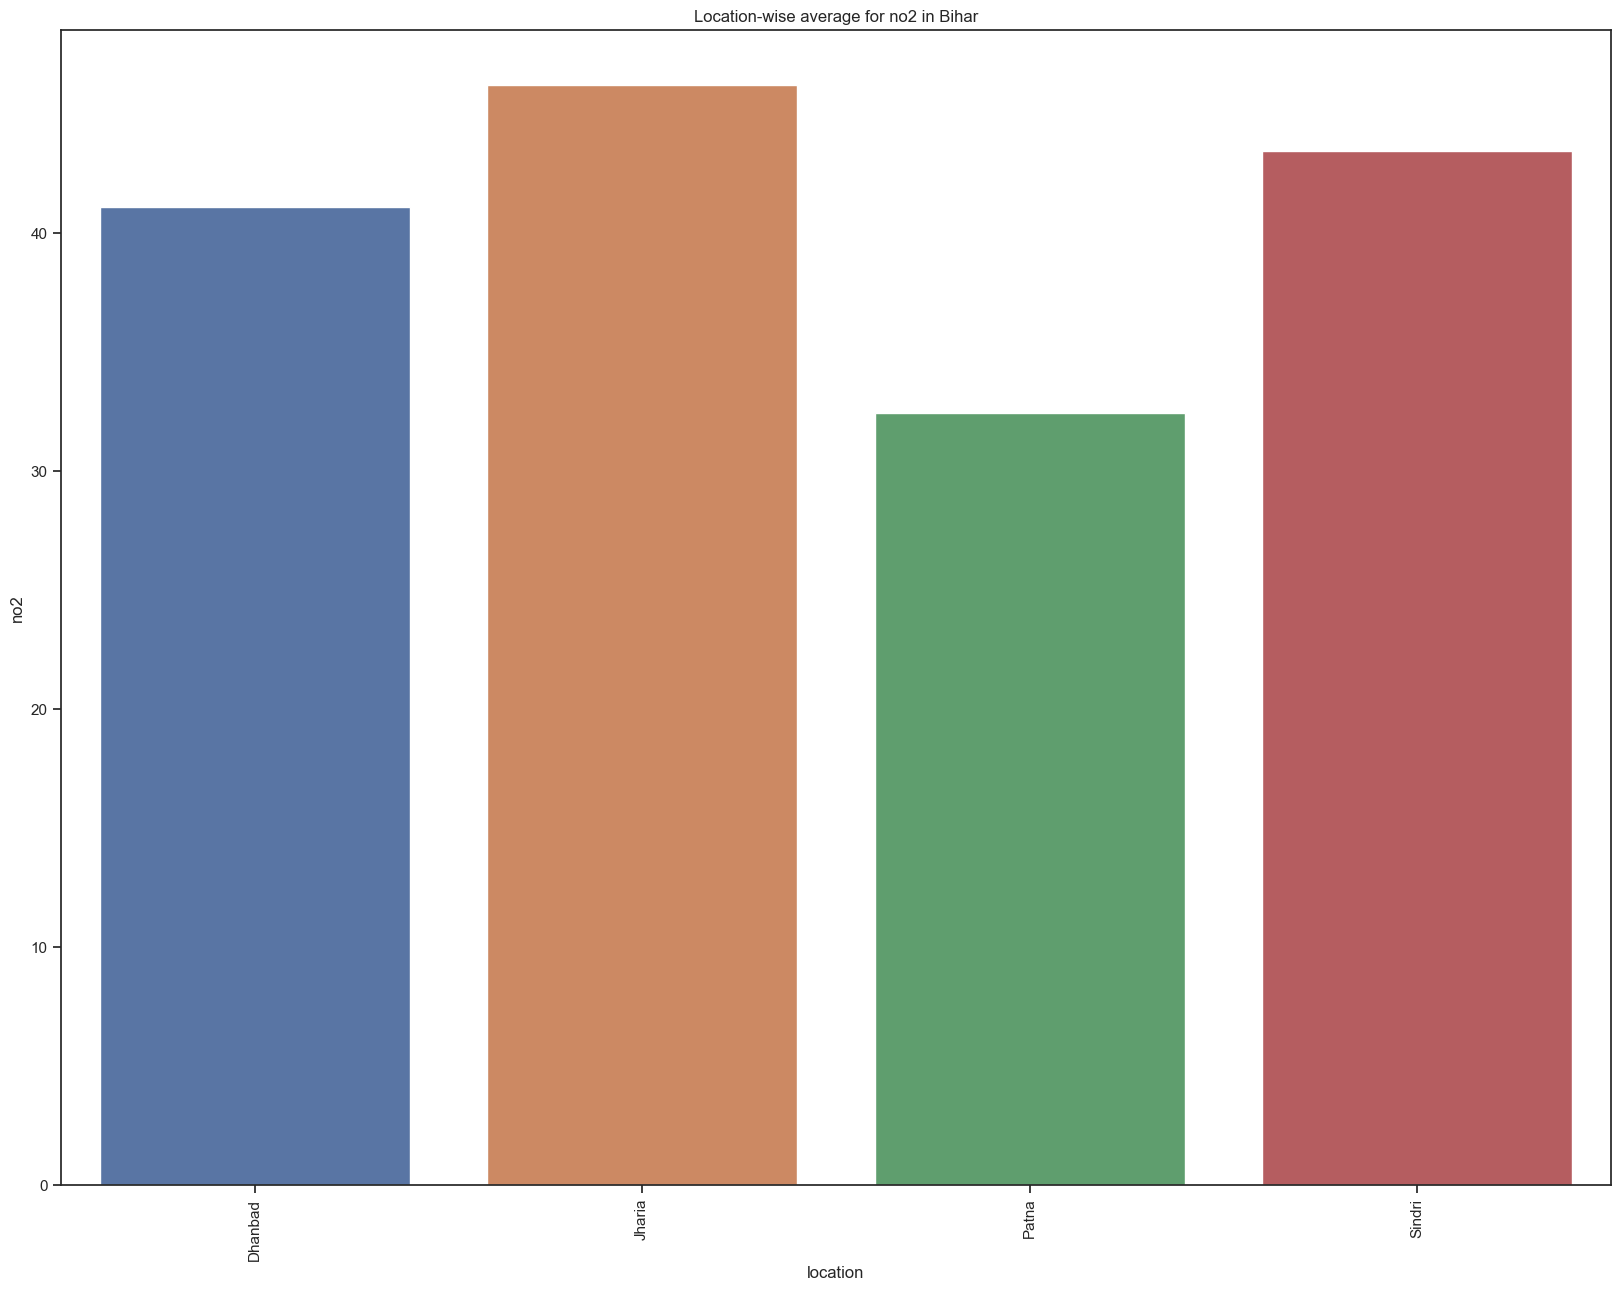

In [23]:
location_avgs("Bihar", "no2")